In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams['font.size'] = 16

# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# matplotlib.rcParams['font.size'] = 0.3
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir('D:\\BaiduSyncdisk\\EHF-文献-数据-文章\\EHF\\EHF\\figure-统计\\mean') #笔记本电脑
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter4')   #台式机

cmap =list(["steelblue", "yellowgreen","orange","lightcoral","red", "green","lightskyblue"])

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 加载数据
file_path = 'FuturePopulation_Exposure_by_year_province_exposure_pop_hwf.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 只选择 Variable == 'TM_SSP245' 的数据
data_tm_ssp245 = data[data['Variable'] == 'TM_SSP245']

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data_tm_ssp245.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 定义线性回归函数
def lm_func(df, col):
    """Simple linear model of a time series data, returns coef, R2, and p-value"""
    
    # Get Data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = model.params[1]
    
    # R2 and p-value
    r2 = model.rsquared_adj
    p = model.pvalues[1]
    
    return round(coef, 4), round(r2, 2), round(p, 3)

# 筛选出 2041-2070 和 2071-2100 时间段的数据
ssp_2041_2070 = data_tm_ssp245[(data_tm_ssp245['Year'] >= 2041) & (data_tm_ssp245['Year'] <= 2070)]
ssp_2071_2100 = data_tm_ssp245[(data_tm_ssp245['Year'] >= 2071) & (data_tm_ssp245['Year'] <= 2100)]

# 使用 lm_func 计算 2041-2070 和 2071-2100 的线性回归参数
coef_2041_2070, r2_2041_2070, p_2041_2070 = lm_func(ssp_2041_2070, 'Population_Exposure')
coef_2071_2100, r2_2071_2100, p_2071_2100 = lm_func(ssp_2071_2100, 'Population_Exposure')

# 打印结果
print(f"2041-2070 Linear Model (TM_SSP245): Coefficient = {coef_2041_2070}, R2 = {r2_2041_2070}, p-value = {p_2041_2070}")
print(f"2071-2100 Linear Model (TM_SSP245): Coefficient = {coef_2071_2100}, R2 = {r2_2071_2100}, p-value = {p_2071_2100}")


2041-2070 Linear Model (TM_SSP245): Coefficient = 216253.679, R2 = 0.05, p-value = 0.0
2071-2100 Linear Model (TM_SSP245): Coefficient = 68343.4801, R2 = 0.0, p-value = 0.121


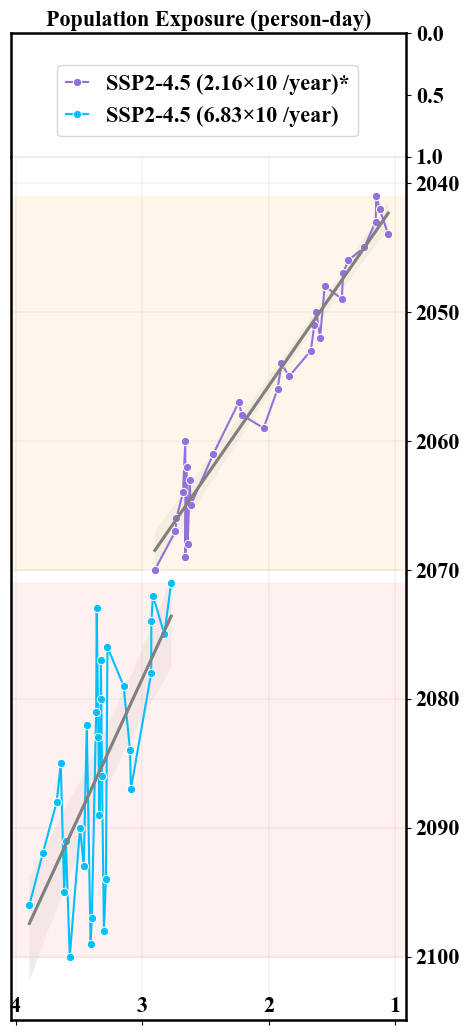

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 加载数据
file_path = 'FuturePopulation_Exposure_by_year_province_exposure_pop_hwf.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 分割数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2020)]
ssp_2041_2070 = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2070)]
ssp_2071_2100 = total_exposure[(total_exposure['Year'] >= 2071) & (total_exposure['Year'] <= 2100)]

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.6, 10.5), sharex=True, gridspec_kw={'height_ratios': [1, 7], 'hspace': 0.0001})

# 加粗子图的边框线
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.8)

# 设置ax1底边线宽度为0.0
ax1.spines['bottom'].set_linewidth(0.0)
# 设置ax2顶边线宽度为0.5
ax2.spines['top'].set_linewidth(0.1)

plt.subplots_adjust(left=0.012, right=0.87, top=0.97, bottom=0.03)

# 绘制2001-2020年全国总体暴露情况
sns.lineplot(data=historical_data, x='Population_Exposure', y='Year', label='Historical (0.54×10 /year)*', marker='o', color='limegreen', ax=ax1)
sns.regplot(data=historical_data, x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax1)

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5 (2.16×10 /year)*', marker='o', color='mediumpurple', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5 (6.83×10 /year) ', marker='o', color='deepskyblue', ax=ax2)

# 绘制回归线
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)

# 设置轴标签和方向
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_right()

ax2.set_xlabel('Population Exposure (person-day)')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_right()

# 设置X轴标签的位置
ax2.xaxis.set_label_coords(0.5, 1.17)

# 将X轴的标签放在框线下部内部
ax2.xaxis.set_tick_params(pad=-20)

# 设置图例
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.79, 0.95), fontsize=16, handlelength=1)

# 去除子图单独的图例

ax2.get_legend().remove()

# 添加网格

ax2.grid(True)

# 设置Y轴的刻度
ax2.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
ax2.set_yticklabels(['2040', '2050', '2060', '2070', '2080', '2090', '2100'])

# 添加浅色填充表示时间段
x_min, x_max = ax2.get_xlim()
ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)  # 2041-2070
ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)  # 2071-2100

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax2.set_xlim(x_min, x_max)

# 设置网格线的线宽
ax2.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')

# 设置x轴的刻度格式为科学记数法
def format_func(value, tick_number):
    return f'{value / 1e8:.0f}'

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# 保存图像
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-04-06-热浪暴露总数时序变化-ssp245.png', dpi=400, bbox_inches='tight',facecolor="none", transparent=True)

# 显示图像
plt.show()


In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 加载数据
file_path = 'FuturePopulation_Exposure_by_year_province_exposure_pop_hwf.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 只选择 Variable == 'TM_SSP245' 的数据
data_tm_ssp245 = data[data['Variable'] == 'TM_SSP585']

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data_tm_ssp245.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 定义线性回归函数
def lm_func(df, col):
    """Simple linear model of a time series data, returns coef, R2, and p-value"""
    
    # Get Data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = model.params[1]
    
    # R2 and p-value
    r2 = model.rsquared_adj
    p = model.pvalues[1]
    
    return round(coef, 4), round(r2, 2), round(p, 3)

# 筛选出 2041-2070 和 2071-2100 时间段的数据
ssp_2041_2070 = data_tm_ssp245[(data_tm_ssp245['Year'] >= 2041) & (data_tm_ssp245['Year'] <= 2070)]
ssp_2071_2100 = data_tm_ssp245[(data_tm_ssp245['Year'] >= 2071) & (data_tm_ssp245['Year'] <= 2100)]

# 使用 lm_func 计算 2041-2070 和 2071-2100 的线性回归参数
coef_2041_2070, r2_2041_2070, p_2041_2070 = lm_func(ssp_2041_2070, 'Population_Exposure')
coef_2071_2100, r2_2071_2100, p_2071_2100 = lm_func(ssp_2071_2100, 'Population_Exposure')

# 打印结果
print(f"2041-2070 Linear Model (TM_SSP585): Coefficient = {coef_2041_2070}, R2 = {r2_2041_2070}, p-value = {p_2041_2070}")
print(f"2071-2100 Linear Model (TM_SSP585): Coefficient = {coef_2071_2100}, R2 = {r2_2071_2100}, p-value = {p_2071_2100}")


2041-2070 Linear Model (TM_SSP585): Coefficient = 400519.4736, R2 = 0.06, p-value = 0.0
2071-2100 Linear Model (TM_SSP585): Coefficient = 1317.0683, R2 = -0.0, p-value = 0.982


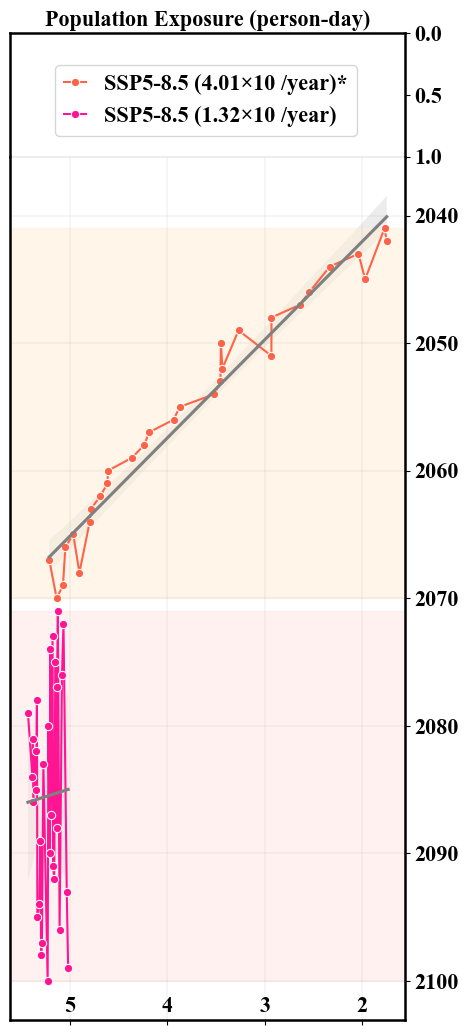

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 加载数据
file_path = 'FuturePopulation_Exposure_by_year_province_exposure_pop_hwf.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 分割数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2020)]
ssp_2041_2070 = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2070)]
ssp_2071_2100 = total_exposure[(total_exposure['Year'] >= 2071) & (total_exposure['Year'] <= 2100)]


# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.6, 10.5), sharex=True, gridspec_kw={'height_ratios': [1, 7], 'hspace': 0.0001})

# 加粗子图的边框线
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.8)

# 设置ax1底边线宽度为0.0
ax1.spines['bottom'].set_linewidth(0.0)
# 设置ax2顶边线宽度为0.5
ax2.spines['top'].set_linewidth(0.1)

plt.subplots_adjust(left=0.012, right=0.87, top=0.97, bottom=0.03)

# 绘制2001-2020年全国总体暴露情况
sns.lineplot(data=historical_data, x='Population_Exposure', y='Year', label='Historical (0.54×10 /year)*', marker='o', color='limegreen', ax=ax1)
sns.regplot(data=historical_data, x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax1)

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5 (4.01×10 /year)*', marker='o', color='tomato', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5 (1.32×10 /year) ', marker='o', color='deeppink', ax=ax2)

# 绘制回归线
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)

# 设置轴标签和方向
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_right()

ax2.set_xlabel('Population Exposure (person-day)')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_right()

# 设置X轴标签的位置
ax2.xaxis.set_label_coords(0.5, 1.17)

# 将X轴的标签放在框线下部内部
ax2.xaxis.set_tick_params(pad=-20)

# 设置图例
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.79, 0.95), fontsize=16, handlelength=1)

# 去除子图单独的图例

ax2.get_legend().remove()

# 添加网格

ax2.grid(True)

# 设置Y轴的刻度
ax2.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
ax2.set_yticklabels(['2040', '2050', '2060', '2070', '2080', '2090', '2100'])

# 添加浅色填充表示时间段
x_min, x_max = ax2.get_xlim()
ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)  # 2041-2070
ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)  # 2071-2100

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax2.set_xlim(x_min, x_max)

# 设置网格线的线宽
ax2.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')

# 设置x轴的刻度格式为科学记数法
def format_func(value, tick_number):
    return f'{value / 1e8:.0f}'

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# 保存图像
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-04-06-热浪暴露总数时序变化-ssp585.png', dpi=400, bbox_inches='tight',facecolor="none", transparent=True)

# 显示图像
plt.show()


In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 加载数据
file_path = 'Historical_FuturePopulation_Exposure_by_year_province_exposure_pop_hwf.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 只选择 Variable == 'TM_SSP245' 的数据
data_tm_ssp245 = data[data['Variable'] == 'TM_historical']

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data_tm_ssp245.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 定义线性回归函数
def lm_func(df, col):
    """Simple linear model of a time series data, returns coef, R2, and p-value"""
    
    # Get Data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = model.params[1]
    
    # R2 and p-value
    r2 = model.rsquared_adj
    p = model.pvalues[1]
    
    return round(coef, 4), round(r2, 2), round(p, 3)

# 筛选出 2041-2070 和 2071-2100 时间段的数据
ssp_2041_2070 = data_tm_ssp245[(data_tm_ssp245['Year'] >= 2001) & (data_tm_ssp245['Year'] <= 2022)]


# 使用 lm_func 计算 2041-2070 和 2071-2100 的线性回归参数
coef_2041_2070, r2_2041_2070, p_2041_2070 = lm_func(ssp_2041_2070, 'Population_Exposure')

# 打印结果
print(f"2001-2022 Linear Model (TM_historical): Coefficient = {coef_2041_2070}, R2 = {r2_2041_2070}, p-value = {p_2041_2070}")
# 打印结果



2001-2022 Linear Model (TM_historical): Coefficient = 137868.3881, R2 = 0.06, p-value = 0.0


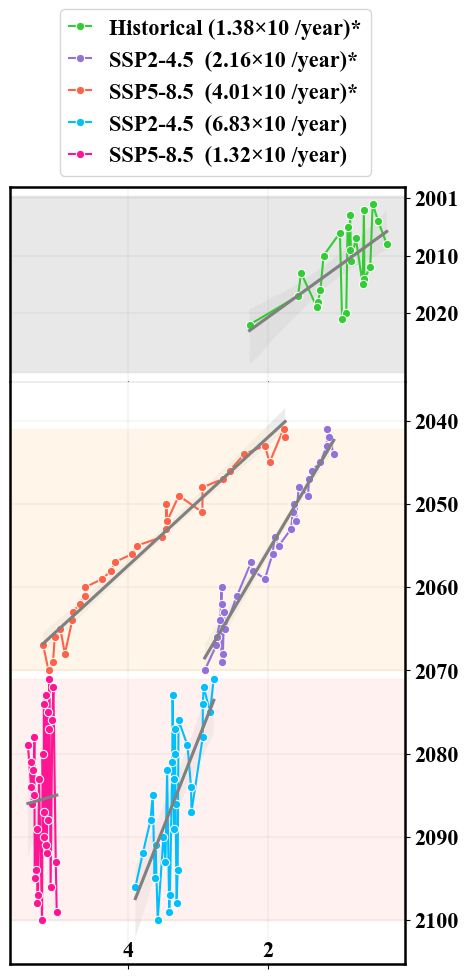

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = 'Historical_FuturePopulation_Exposure_by_year_province_exposure_pop_hwf.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 分割数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2022)]
ssp_2041_2070 = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2070)]
ssp_2071_2100 = total_exposure[(total_exposure['Year'] >= 2071) & (total_exposure['Year'] <= 2100)]

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.6, 10.5), sharex=True, gridspec_kw={'height_ratios': [1, 3], 'hspace': 0.001})

# 加粗子图的边框线
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.8)

# 设置ax1底边线宽度为0.0
ax1.spines['bottom'].set_linewidth(0.0)
# 设置ax2顶边线宽度为0.5
ax2.spines['top'].set_linewidth(0.1)

plt.subplots_adjust(left=0.012, right=0.87, top=0.77, bottom=0.03)

# 绘制2001-2020年全国总体暴露情况
sns.lineplot(data=historical_data, x='Population_Exposure', y='Year', label='Historical (1.38×10 /year)*', marker='o', color='limegreen', ax=ax1)
sns.regplot(data=historical_data, x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax1)

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (2.16×10 /year)*', marker='o', color='mediumpurple', ax=ax2)
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (4.01×10 /year)*', marker='o', color='tomato', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (6.83×10 /year) ', marker='o', color='deepskyblue', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (1.32×10 /year) ', marker='o', color='deeppink', ax=ax2)

# 绘制回归线
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)

# 设置轴标签和方向
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_right()

ax2.set_xlabel(' ')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_right()

# 设置X轴标签的位置
ax2.xaxis.set_label_coords(0.5, 1.38)

# 将X轴的标签放在框线下部内部
ax2.xaxis.set_tick_params(pad=-20)

# 设置图例
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.82, 0.95), fontsize=16,handlelength=1)

# 去除子图单独的图例
ax1.get_legend().remove()
ax2.get_legend().remove()
# 添加网格
ax1.grid(True)
ax2.grid(True)

# 设置Y轴的刻度
ax1.set_yticks([2000, 2010, 2020])
ax1.set_yticklabels(['2001', '2010', '2020'])

ax2.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
ax2.set_yticklabels(['2040', '2050', '2060', '2070', '2080', '2090', '2100'])

ax2.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# 保存图像

# 获取ax1中的最大和最小年份
y_min, y_max = ax1.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax1.get_xlim()

# 使用fill_betweenx方法在指定范围内添加填充
ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax1.set_xlim(x_min, x_max)


# 获取ax2中的最大和最小年份
y_min, y_max = ax2.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax2.get_xlim()

# 对2041-2070年份范围添加浅红色填充
ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)

# 对2071-2100年份范围添加浅黄色填充
ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax2.set_xlim(x_min, x_max)

import matplotlib.ticker as ticker

# 设置网格线的线宽
ax1.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax1.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
ax2.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')

# 设置x轴的刻度格式为科学记数法
def format_func(value, tick_number):
    return f'{value / 1e8:.0f}'

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# # 确保之前添加的填充与刻度格式调整不冲突
# ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# # 再次设置原有的x轴边界，以保持数据展示的一致性
# ax1.set_xlim(x_min, x_max)
# ax2.set_xlim(x_min, x_max)

# 注意：确保将填充代码放在所有绘图代码之后，这样填充不会覆盖数据线
plt.savefig('0111_exposure_change.png', dpi=500, facecolor="none", transparent=True)
# plt.savefig('01_exposure_change.jpg', dpi=300, facecolor="none", transparent=True)
plt.show()


In [2]:
import pandas as pd

# Load the dataset
file_path = 'Historical_FuturePopulation_Exposure_by_year_province_exposure_pop_hwf.csv'
data = pd.read_csv(file_path)

# Group the data by Year and Variable (which represents the climate scenarios) and calculate the sum of Population_Exposure
total_exposure_by_year_scenario = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# Output the result to a CSV file
output_file = 'total_population_exposure_by_year_scenario.csv'
total_exposure_by_year_scenario.to_csv(output_file, index=False)

# Display the output file path
output_file


'total_population_exposure_by_year_scenario.csv'